<a href="https://colab.research.google.com/github/souptikmajumder/GDP-Analysis/blob/master/GDP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Part IA</h2>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob
import squarify

df=pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv') # Data I-A with original dataframe

df.set_index("Items  Description",inplace=True) #indexing based on Items Description

df.head()


,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Items Description,,,,,,,,,,,,,,,,,,,,,
GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [0]:

df=df[df.Duration!='2016-17'] #dropped rows for Duration 2016-17


null_columns=df.columns[df.isnull().sum()== len(df.index)] #check for null columns and hence drop them
df=df.drop(null_columns,axis=1)



df_growth=df.loc['(% Growth over previous year)'] #creating two seprate dataframe for filling out the null values
df_gsdp =df.loc['GSDP - CURRENT PRICES (` in Crore)']


df_growth = df_growth.fillna(df_growth.mean()) #indexing based on duration
df_gsdp = df_gsdp.fillna(df_gsdp.mean())

df_growth.set_index("Duration",inplace=True)
df_gsdp.set_index("Duration",inplace=True)


df_growth.head()#dataframe for percentage growth over previous years

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.890000,11.31,...,13.84,11.70,12.780000,13.65,14.12,11.13,15.14,13.81,12.23,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.420000,10.09,...,13.51,12.63,18.140000,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.140000,4.70,...,12.51,13.05,15.920000,10.51,8.12,10.89,12.33,10.96,10.14,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,12.816667,17.91,...,10.99,12.61,15.613333,10.58,13.65,12.90,8.84,12.09,10.15,9.99


In [0]:
df_gsdp.head() #dataframe for GSDP(in crores) for the states

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.00,78254.0,...,751485.0,359433.0,19208.00,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.00,87105.0,...,855481.0,401493.0,21663.00,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.00,95893.0,...,971090.0,452186.0,25593.00,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.00,100404.0,...,1092564.0,511178.0,29667.00,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,88668.25,118387.0,...,1212668.0,575631.0,24032.75,1153795.0,184091.0,4820.0,30304.0,551963.0,26533.0,13675331.0


In [0]:
avg_grow=pd.DataFrame({'Average Growth % (2012-16)':df_growth.mean().iloc[range(len(df_growth.columns)-1)].sort_values(ascending=False)})
avg_grow.head() #dataframe for average growth rate of states from 2012-16

,Average Growth % (2012-16)
Mizoram,16.866667
Nagaland,15.953333
Tripura,15.613333
Madhya Pradesh,14.647500
Karnataka,14.230000


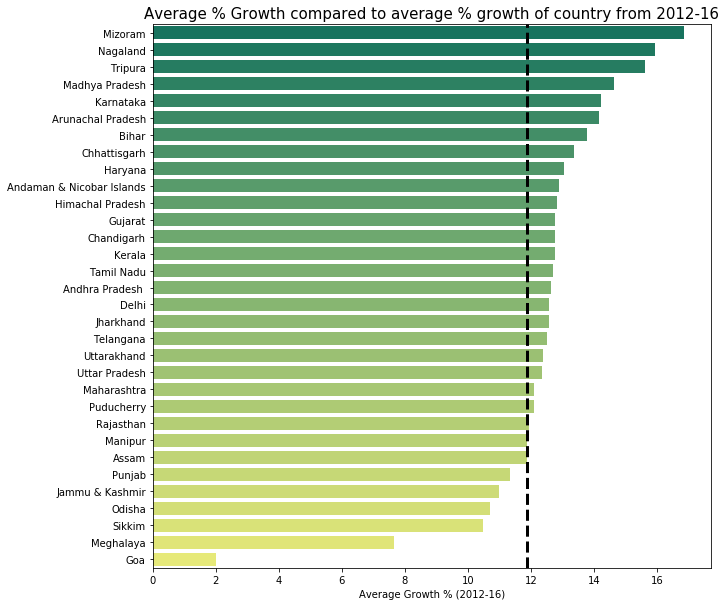

In [0]:
fig= plt.figure(figsize=(10,10))
sns.barplot(y=avg_grow.index,x=avg_grow['Average Growth % (2012-16)'],palette="summer")
plt.axvline((df_growth['All_India GDP']).mean(),color='k',linestyle='dashed',linewidth=3)
plt.title('Average % Growth compared to average % growth of country from 2012-16',fontsize=15)
plt.savefig('fig1.png')
plt.show()





<h3>Top 3 Fastest Growing States based on average growth rate from 2012-16:<br></h3>
1. Mizoram<br>
2. Nagaland<br>
3. Tripura<br>
<h3>Bottom 3 Struggling States based on average growth rate from 2012-16:<br></h3>
1. Goa<br>
2. Meghalaya<br>
3. Sikkim<br>


<h3>Analysis for home State of Karnataka</h3>

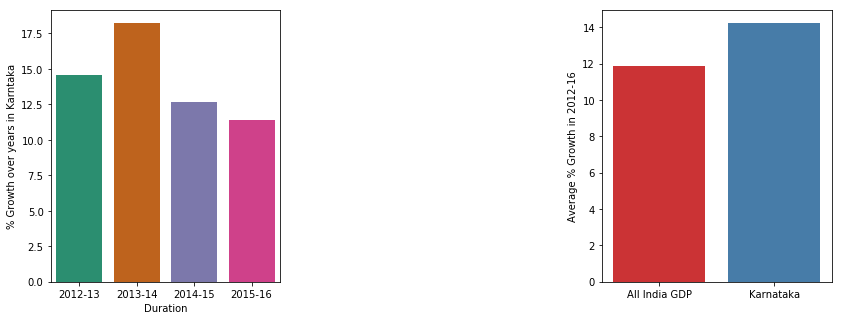

In [0]:
#considering karnataka as home state
fig = plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.barplot(x=df_growth.index,y=df_growth['Karnataka'],palette='Dark2')
plt.ylabel('% Growth over years in Karntaka')
plt.subplot(1,3,3)
sns.barplot(y=[df_growth['All_India GDP'].mean(),df_growth['Karnataka'].mean()],x=['All India GDP','Karnataka'],palette='Set1')
plt.ylabel('Average % Growth in 2012-16')
plt.show()


Home state of Karnataka has performed fairly well over the 4 years as compared to average growth of the country but proper investigation should be done on steep decrease in growth rate from 2014-2016.

In [0]:
gdp_values=df_gsdp.loc['2015-16'].iloc[range(len(df_gsdp.columns)-1)].sort_values(ascending=False)
total_gdp=pd.DataFrame({'Total_GDP(in Crore)':gdp_values})
total_gdp.head() #dataframe for total GDP of states in 2015-16

,Total_GDP(in Crore)
Maharashtra,1540265.25
Tamil Nadu,1212668.00
Uttar Pradesh,1153795.00
Karnataka,1027068.00
Gujarat,994316.00


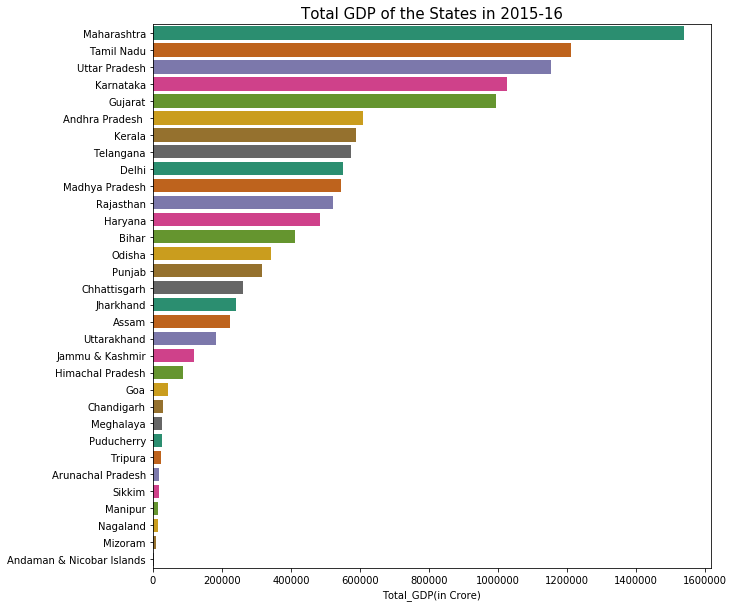

In [0]:
fig=plt.figure(figsize=(10,10))
sns.barplot(y=total_gdp.index,x=total_gdp['Total_GDP(in Crore)'],palette='Dark2')
plt.title('Total GDP of the States in 2015-16',fontsize=15)
plt.show()

<b>Based on GDP Analysis , Top 5 states in 2015-16 were:<br></b>
1. Maharashtra<br>
2. Tamil Nadu<br>
3. Uttar Pradesh<br>
4. Karnataka<br>
5. Gujarat<br>

<b>and, Bottom 5 states are:</b><br>
1. Andaman & Nicobar Islands<br>
2. Mizoram<br>
3. Nagaland<br>
4. Manipur<br>
5. Sikkim<br>

<h2>Part I-B</h2>

<h3>Merging all states gsdp data to a single DataFrame for year 2014-15</h3>

In [0]:
all_states=['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','chattisgarh','Goa','Gujarat','Haryana',
               'Himachal Pradesh','Jharkhand','Karnataka','Kerela','Madhya Pradesh','Maharashtra','Manipur','Meghalaya',
               'Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura',
               'Uttar Pradesh','Uttarakhand']
def read_files():
    path = r'states/' # use your path
    all_files = sorted(glob.glob(path + "/*.csv"))

    li = []

    for filename in all_files:
        df = pd.read_csv(filename,encoding = "ISO-8859-1")
        li.append(df)
    
    frame = pd.concat(li,axis=1,sort=False)
    frame=frame.drop(columns='S.No.')
    #frame=frame.set_index(['State','Item'],drop=True)

    return frame

df_states_GDP=read_files()    
df_states_GDP=df_states_GDP.T.drop(['2011-12','2012-13','2013-14','2015-16','2016-17'])
df_states_GDP.index.name='indexes'
df_states_GDP=df_states_GDP.reset_index('indexes').drop(columns='indexes') # the following dataframe consists of 2014-15 data
df_states_GDP.drop_duplicates(inplace=True)
df_states_GDP # there are few item list marked with * due to which there are duplicates even after dropping them
df_states_GDP.drop([12,22,52],inplace=True) # dropping row 14,24,56
col_headers=df_states_GDP.loc[0] # list of  items to be made as column headers
df_states_GDP=df_states_GDP.iloc[1:]
df_states_GDP.columns=col_headers
df_states_GDP.set_index([all_states],inplace=True) # setting all the states as index list
df_states_GDP.fillna(0,inplace=True)
df_states_GDP.head() #final dataframe to be used for part I b

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,4405409.0,2200897.0,4215389.0,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,48418.0,243867.0,218728.0,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,1412466.0,1373611.0,1795658.0,9307109.0,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,3740641.0,2078171.0,4587589.0,22179969.0,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0
chattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,2462166.0,867982.0,1112232.0,7588778.0,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0


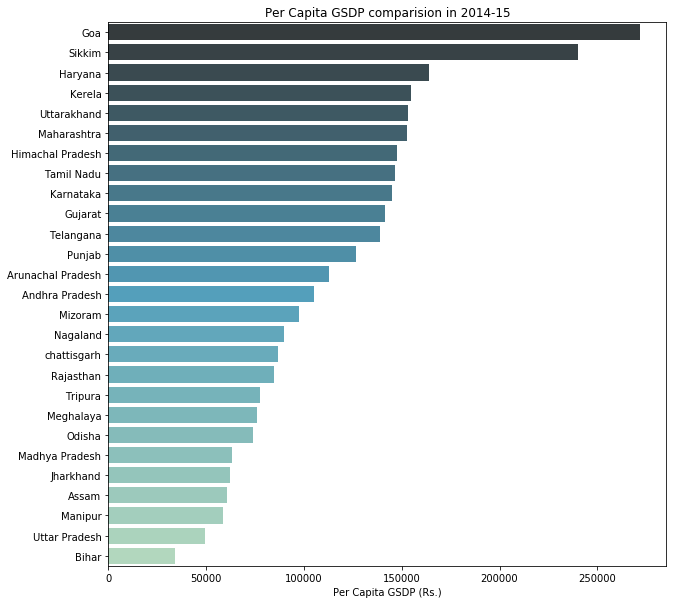

In [0]:
rate_gsdp=pd.DataFrame(df_states_GDP['Per Capita GSDP (Rs.)'].sort_values(ascending=False)) # dataframe for comparing state gdp
fig_1=plt.figure(figsize=(10.0,10.0))
sns.barplot(y=rate_gsdp.index,x=rate_gsdp['Per Capita GSDP (Rs.)'],palette='GnBu_d')
plt.title('Per Capita GSDP comparision in 2014-15',fontsize=12)
plt.show()

<h3> Top 5 states based on GDP per Capita:</h3>
1.  Goa<br>
2.  Sikkim<br>
3.  Haryana<br>
4.  Kerela<br>
5.  Uttarakhand<br>
<h3> Bottom 5 states based on GDP per Capita:</h3>
1.  Bihar<br>
2.  Uttar Pradesh<br>
3.  Manipur<br>
4.  Assam<br>
5.  Jharkhand<br>

<h3>Ratio of Highest Per Capita GDP to Lowest Per Capita GDP:<h3>

In [0]:
rate_gsdp.iloc[1]['Per Capita GSDP (Rs.)']/rate_gsdp.iloc[-1]['Per Capita GSDP (Rs.)']


7.076456382164104

<h3>Percentage Contribution of Sectors in GDP</h3>

In [0]:
prim=pd.DataFrame((df_states_GDP['Primary']/df_states_GDP['Gross State Domestic Product'])*100)
secon=pd.DataFrame((df_states_GDP['Secondary']/df_states_GDP['Gross State Domestic Product'])*100)
terti=pd.DataFrame((df_states_GDP['Secondary']/df_states_GDP['Gross State Domestic Product'])*100)

sector_contributions=pd.concat([prim,secon,terti],axis=1)
sector_contributions.columns=['primary','secondary','tertiary']
sector_contributions.head()  # dataframe for percentage contribution of states to various sectors




,primary,secondary,tertiary
Andhra Pradesh,30.968080,19.923102,19.923102
Arunachal Pradesh,42.774946,17.152064,17.152064
Assam,26.889201,20.359070,20.359070
Bihar,21.448437,16.005825,16.005825
chattisgarh,27.239629,35.061805,35.061805


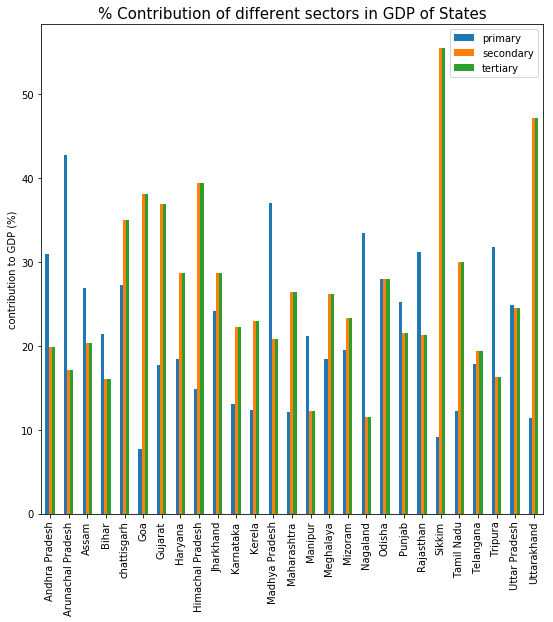

In [0]:
sector_contributions.plot(kind='bar',figsize=(9,9)) #plot for sector contribution to GSDP
plt.title('% Contribution of different sectors in GDP of States',fontsize=15)
plt.ylabel('contribution to GDP (%)')
plt.show()


In [0]:
per_capita_GDP=df_states_GDP['Per Capita GSDP (Rs.)']
df_states_GDP['Category']=pd.qcut(per_capita_GDP,[0.0,0.20,0.50,0.85,1.00],labels=['C4','C3','C2','C1'])
df_subcategory=df_states_GDP.groupby(['Category']).sum()
df_subcategory=df_subcategory.drop(['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products',
                             'Subsidies on products',"Population ('00)","Per Capita GSDP (Rs.)"],axis=1)
df_states_GDP.head() # assigning category to each state

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Category
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,2200897.0,4215389.0,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,C3
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,243867.0,218728.0,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,C2
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,...,1373611.0,1795658.0,9307109.0,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0,C4
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,...,2078171.0,4587589.0,22179969.0,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0,C4
chattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,...,867982.0,1112232.0,7588778.0,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0,C3


In [0]:
df_subcategory.head() # dataframe on GSDP from categories and respective sub-categories 

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Category,,,,,,,,,,,,,,,,,,,,,
C4,56735044.0,39331055.0,11901405.0,3673623.0,1828960.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,...,7411,116154.0,275233.0,221940.0,4462395.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0
C3,42226888.0,23676317.0,11135794.0,4045895.0,3368881.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,...,145480,58970.0,1039231.0,75393.0,3050206.0,5766226.0,16224118.0,7927173.0,12815417.0,177966387.0
C2,75209022.0,47550095.0,19363891.0,5603213.0,2691822.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,...,318192,659841.0,5343732.0,368515.0,9408861.0,36296642.0,92121446.0,18567815.0,36253657.0,586380452.0
C1,14391809.0,7962514.0,4619756.0,872335.0,937204.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,...,44776,171388.0,281108.0,18106.0,1420517.0,3936489.0,14740245.0,3571292.0,8059922.0,101930677.0


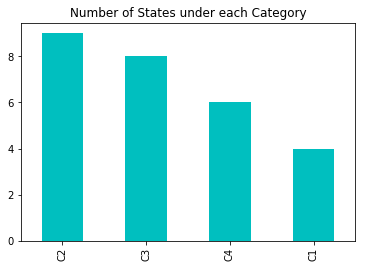

In [0]:
df_states_GDP['Category'].value_counts().plot(kind='bar',color="c")
plt.title("Number of States under each Category")
plt.show()

In [0]:
import operator
import collections as cs
category_dict={}
def get_sub_sector_list(a): #defining a method for returning a list of sub-sectors which contribute 80% to GSDP
  
    for x in df_subcategory.columns[:-1]:
        
        category_dict.update({x:round(df_subcategory.loc[a][x]/df_subcategory.loc['C4']['Gross State Domestic Product'] * 100,2)})
    
    sorted_category_dict = sorted(category_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_category_dict=dict(sorted_category_dict)
    sub_sector=[]
    total=0
    for key,value in sorted_category_dict.items():
        total=total+value
        sub_sector.append(key)
        if(total>80): 
            break
    return sub_sector 

def get_sub_sector_share(a): #defining a method for returning shares/% contribution from sub-sectors 
  
    for x in df_subcategory.columns[:-1]:
        
        category_dict.update({x:round(df_subcategory.loc[a][x]/df_subcategory.loc['C4']['Gross State Domestic Product'] * 100,2)})
    
    sorted_category_dict = sorted(category_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_category_dict=dict(sorted_category_dict)
    return sorted_category_dict # return list of subsectors whose contribution to GSDP is approx
         
   

<h3> list of subsectors in category C1 contributing to approx 80% of GDP </h3>


In [0]:
sub_sector_C1=get_sub_sector_list('C1')
sub_sector_C1 #list of subsectors in category C1 contributing to approx 80% of GDP


['Real estate, ownership of dwelling & professional services',
 'Agriculture, forestry and fishing',
 'Trade, repair, hotels and restaurants',
 'Manufacturing',
 'Trade & repair services',
 'Construction',
 'Other services',
 'Crops',
 'Transport, storage, communication & services related to broadcasting',
 'Livestock',
 'Road transport',
 'Financial services',
 'Public administration',
 'Electricity, gas, water supply & other utility services',
 'Communication & services related to broadcasting',
 'Hotels & restaurants',
 'Fishing and aquaculture',
 'Forestry and logging',
 'Mining and quarrying',
 'Railways',
 'Services incidental to transport',
 'Air transport',
 'Water transport',
 'Storage']

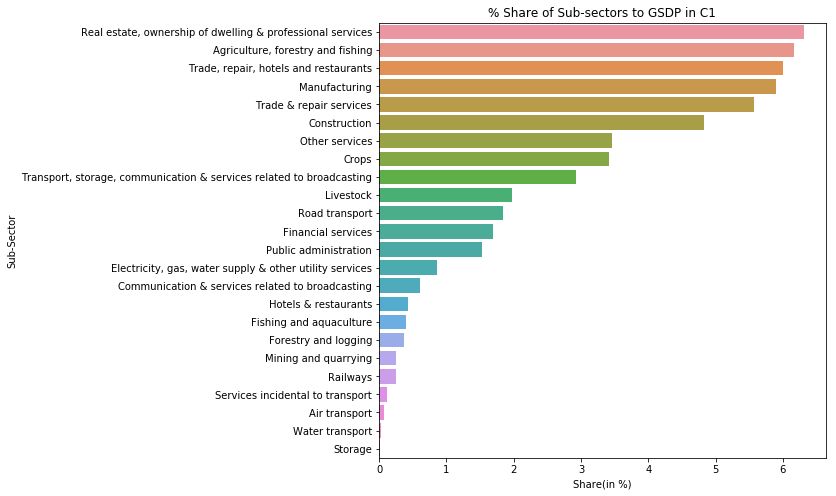

In [0]:
c1_data_subsector=pd.DataFrame(get_sub_sector_share('C1').items())
c1_data_subsector.columns=['Sub-Sector','Share(in %)']
fig_ax=plt.figure(figsize=[8,8])
sns.barplot(y=c1_data_subsector['Sub-Sector'],x=c1_data_subsector['Share(in %)'])
plt.title('% Share of Sub-sectors to GSDP in C1')
plt.show()

<h3> list of subsectors in category C2 contributing to approx 80% of GDP </h3>

In [0]:
sub_sector_C2=get_sub_sector_list('C2')
sub_sector_C2 #list of subsectors in category C2 contributing to approx 80% of GDP


['Manufacturing', 'Real estate, ownership of dwelling & professional services']

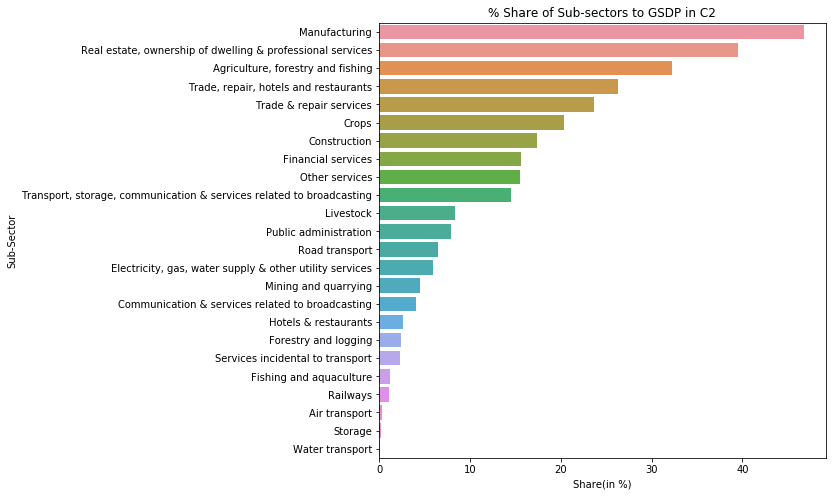

In [0]:
c2_data_subsector=pd.DataFrame(get_sub_sector_share('C2').items())
c2_data_subsector.columns=['Sub-Sector','Share(in %)']
fig_ax=plt.figure(figsize=[8,8])
sns.barplot(y=c2_data_subsector['Sub-Sector'],x=c2_data_subsector['Share(in %)'])
plt.title('% Share of Sub-sectors to GSDP in C2')
plt.show()

<h3> list of subsectors in category C3 contributing to approx 80% of GDP </h3>

In [0]:
sub_sector_C3=get_sub_sector_list('C3')
sub_sector_C3 #list of subsectors in category C3 contributing to approx 80% of GDP

['Agriculture, forestry and fishing',
 'Crops',
 'Manufacturing',
 'Trade, repair, hotels and restaurants',
 'Real estate, ownership of dwelling & professional services',
 'Trade & repair services',
 'Construction',
 'Other services',
 'Transport, storage, communication & services related to broadcasting',
 'Livestock']

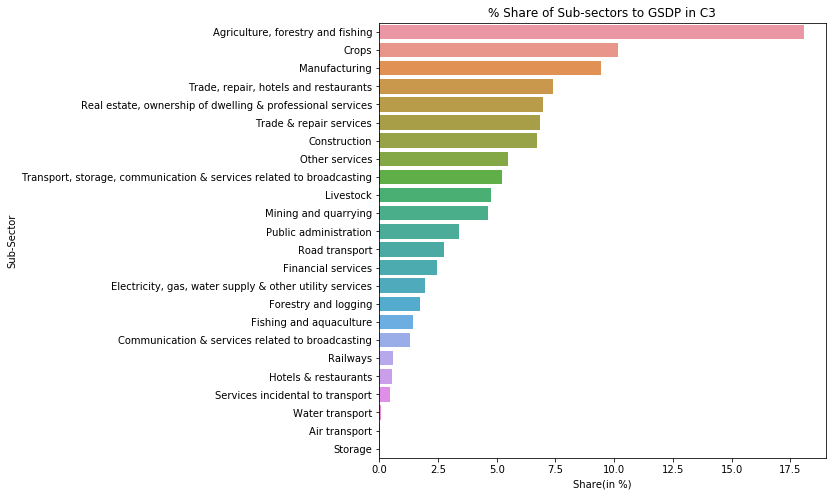

In [0]:
c3_data_subsector=pd.DataFrame(get_sub_sector_share('C3').items())
c3_data_subsector.columns=['Sub-Sector','Share(in %)']
fig_ax=plt.figure(figsize=[8,8])
sns.barplot(y=c3_data_subsector['Sub-Sector'],x=c3_data_subsector['Share(in %)'])
plt.title('% Share of Sub-sectors to GSDP in C3')
plt.show()

<h3>list of subsectors in category C4 contributing to approx 80% of GDP</h3>

In [0]:
sub_sector_C4=get_sub_sector_list('C4')
sub_sector_C4 #list of subsectors in category C4 contributing to approx 80% of GDP

['Agriculture, forestry and fishing',
 'Crops',
 'Trade, repair, hotels and restaurants',
 'Trade & repair services',
 'Manufacturing',
 'Real estate, ownership of dwelling & professional services']

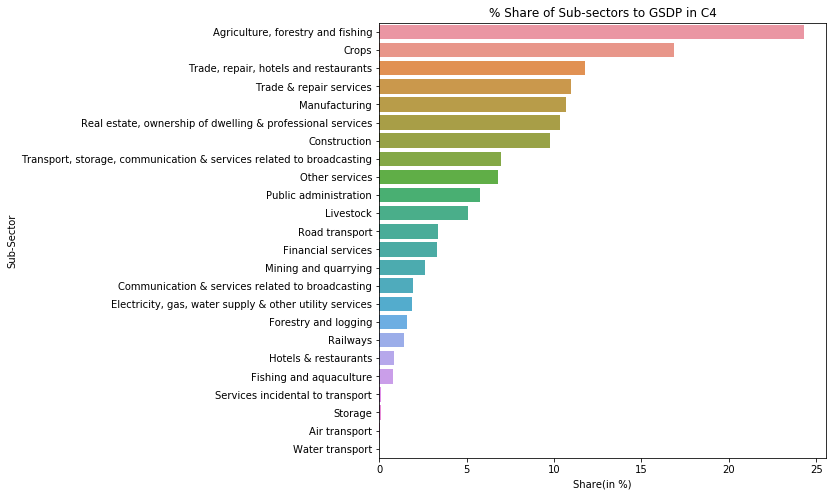

In [0]:
c4_data_subsector=pd.DataFrame(get_sub_sector_share('C4').items())
c4_data_subsector.columns=['Sub-Sector','Share(in %)']
fig_ax=plt.figure(figsize=[8,8])
sns.barplot(y=c4_data_subsector['Sub-Sector'],x=c4_data_subsector['Share(in %)'])
plt.title('% Share of Sub-sectors to GSDP in C4')
plt.show()

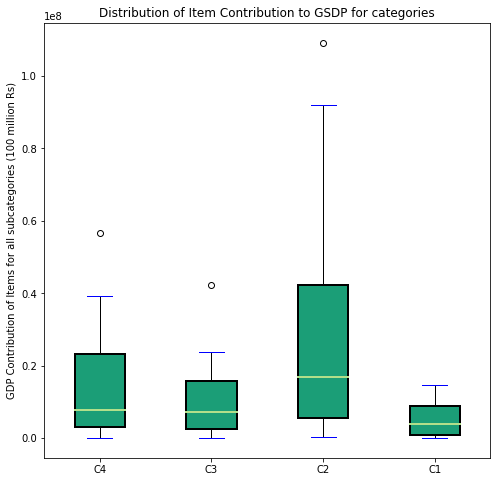

In [0]:
df_subcategory_boxplot=df_subcategory.drop('Gross State Domestic Product',axis=1)
df_subcategory_boxplot.loc['C4'].values # dataframe for boxplot 

fig = plt.figure(1, figsize=(8, 8))
ax1=fig.add_subplot(111)
bp = ax1.boxplot(df_subcategory_boxplot,patch_artist=True)
ax1.set_xticklabels(['C4', 'C3', 'C2', 'C1'])
ax1.set_ylabel("GDP Contribution of Items for all subcategories (100 million Rs)")

for box in bp['boxes']: #change box colour
    box.set( color='#000000', linewidth=2)
    box.set( facecolor='#1b9e77')
    
for median in bp['medians']: #change median value colour
    median.set(color='#b2df8a', linewidth=2)
    
for whiskers in bp['whiskers']: #change whisker color
    whiskers.set(color="#000000")

for caps in bp['caps']:
    caps.set(color="#0000FF")#change caps colour
    
plt.title("Distribution of Item Contribution to GSDP for categories")    
plt.show()
# boxplot to show Distribution of Value of Contributions made by different sectors




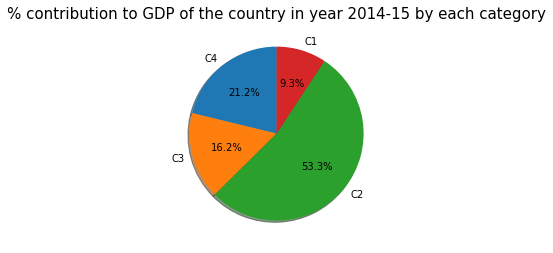

In [0]:
x=df_subcategory['Gross State Domestic Product']/df_gsdp.loc['2014-15']['All_India GDP'] #all india GDP for 2014-15

fig1, ax1 = plt.subplots()
ax1.pie(x, labels=['C4','C3','C2','C1'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("% contribution to GDP of the country in year 2014-15 by each category",fontsize=15)
plt.show()

In [0]:
df_states_GDP_corr=df_states_GDP.drop(['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices','Taxes on Products',
                                       'Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)'],axis=1)
df_states_GDP_corr.head() # dataframe for pairplot of sub-sector and gdp correlation

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants",...,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Category
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,4672266.0,1151729.0,4664889.0,4233400.0,...,14900.0,780200.0,18700.0,928756.0,1900863.0,4405409.0,2200897.0,4215389.0,52646842.0,C3
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,26120.0,113527.0,147842.0,60421.0,...,0.0,109.0,0.0,19568.0,25207.0,48418.0,243867.0,218728.0,1676119.0,C2
Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,2002936.0,296587.0,1733568.0,2987155.0,...,26223.0,35739.0,10308.0,357619.0,543651.0,1412466.0,1373611.0,1795658.0,19809800.0,C4
Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,2189965.0,345168.0,3449763.0,7448373.0,...,13599.0,166600.0,10618.0,919427.0,1178022.0,3740641.0,2078171.0,4587589.0,37391988.0,C4
chattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,4370593.0,1198438.0,2669855.0,1535571.0,...,9507.0,5232.0,16675.0,294552.0,739057.0,2462166.0,867982.0,1112232.0,23498180.0,C3


<h3>Top 5 Sub-sectors with high positive Correlation with GDP</h3>

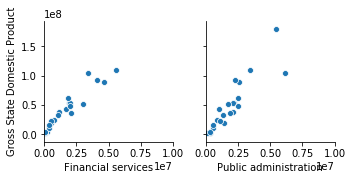

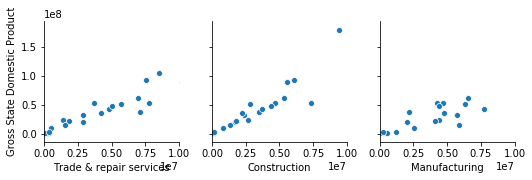

In [0]:

sub_sector_list_1=['Financial services','Public administration',
                  'Trade & repair services','Construction','Manufacturing'] 
#top 5 subsectors with high contribution GDP

sns.pairplot(df_states_GDP_corr,y_vars='Gross State Domestic Product',x_vars=sub_sector_list_1[:2]).set(xlim=(0,1e7)) 

sns.pairplot(df_states_GDP_corr,y_vars='Gross State Domestic Product',x_vars=sub_sector_list_1[2:5]).set(xlim=(0,1e7)) 

plt.show()


<h3>Distribution of Items contributing to total GSDP under each category</h3>

Some key insights obtained from the above distribution plot are:
1. Category C2 has highest number of States,with a low median distribution.This means there is a wide spread disparity over contribution of each item to their GSDP. 
2. Category C1 has lowest number of States.But, all the sub-categories under C1 are contributing with close values to their GSDP values.
3. C1 contributes least to  GDP of country for 2014-15 and C2 the maximum
4. Major sub-sectors contributing to High GDP belong to tertiary and secondary sectors.

<h4>How distribution of C1 is different from others?</h4>
From the bar plot above for sub-category values under category C1,there is a uniform and less spread sub-sector contribution among the top 4 contributing sub-sectors.

<h4>Sub-Sectors to be improved according to GSDP</h4>
From the above analysis, it also seems that <i>Storage,Air-Transport,Water-Transport and services incidental to Transport</i> contribute least to GDP across all categories and hence should be improved for higher GSDP returns.

<h4>Correlation of Sub-sectors with GDP</h4>
Top 5 sub-sectors contributing to high GDP for states are:<br>
1. Financial Services      - <i>Tertiary Sector</i> <br>
2. Public Administration   - <i>Tertiary Sector</i> <br>
3. Trade & repair services - <i>Tertiary Sector</i> <br>
4. Construction            - <i>Secondary Sector</i> <br>
5. Manufacturing           - <i>Secondary Sector</i> <br>



<h3>Recommendations to each category to improve their per capita GDP:</h3><br>
<b>C1</b>:Since, these category of States have the highest per capita GDP, so people belonging to these states should have high spending limit.But instances like hotels and restaurants,Air Transport should have more users and contribute more to the GSDP.Recommendations would be :<br>
  1.  <b><i>Improve hotel quality and services for pulling in more customers.</i></b><br>
  2.  <b><i>Improve availability and affordability of Air Transport for wider number of passengers travelling from             such states.</i></b><br>
  3.  <b><i>Agricultural Awareness should be increased through various campaigns.Forest Resources should be reserved and protected and marine lakes for fishery should be cleaned and taken care as agriculture,forestry and fishing is the second highest contributor to GSDP</i></b>


<b>C2</b>:These category has the highest number of states contributing to the GDP of the country and thereby plays a key role to the development of the country.Recommendations for these category of states would be:<br>
  1.  <b><i>Proper Education and Training should be provided to people involved in Manufacturing Processes</i></b><br>
  2.  <b><i>Setup of new factories and industrial belts to provide employment to the abundant people available in these areas involved in manufacturing industries.</i></b><br>
  3.  <b><i> Agricultural and Irrigational Awareness and education to people can also help boost the contribution  from Agricultural,forestry and fishing sector.</i></b><br>
  
<b>C3,C4</b>:These category of states seems to rely mostly on fishery and farming. So recommendations would be:<br>
  1. <b><i>Imparting proper knowledge of improving soil fertility , appropriate weather conditions to yield maximum amount of crops implanted is necessary</i></b>
  2. <b><i>Good Amount of crops if harvested can also help boost the trading services, and hence appropriate measures should be taken to implement ease of trading in such states</i></b>
  3. <b><i>Infertile/barren/Wasted Lands can be used for setting up of small-scale/large-scale industries to provide employment to the affected farmers with required education and training.This can help in improving the GSDP Contribution from the Manufacturing Sector as well, which is one of the top 5 Sectors in these categories</i></b> 

<h2>Part II</h2>

<h2>Analysis of Correlation between Per Capita GDP and Drop Out Rates In Education<h2>

In [0]:
df_edu_drop=pd.read_csv('rs_session243_au570_1.1.csv')
df_edu_drop.drop('Sl. No.',axis=1,inplace=True)
df_edu_drop.drop([0,5,7,8,9,14,18,26,35,36],inplace=True) # dropping the union territories and West Bengal as not considered before

df_edu_drop.set_index('Level of Education - State',inplace=True)

df_edu_corr_na=df_edu_drop[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

df_edu_corr=df_edu_corr_na.fillna(0) #dropping na values

df_edu_corr['Per Capita GSDP (Rs.)']= df_states_GDP['Per Capita GSDP (Rs.)']

df_edu_corr.head() # final dataset for education drop out for states in 2014-15

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
Level of Education - State,,,,
Andhra Pradesh,4.35,5.20,15.71,104977.0
Arunachal Pradesh,10.89,6.71,17.11,112718.0
Assam,7.44,10.51,27.06,60621.0
Bihar,2.09,4.08,25.90,33954.0
Chhatisgarh,1.42,5.85,21.26,NaN


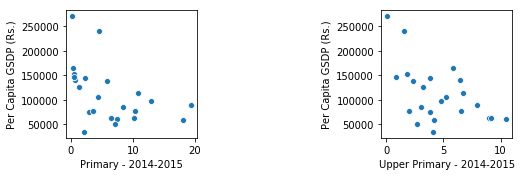

In [0]:
fig=plt.figure(figsize=(8,8))
plt.subplot(331)#scatter plot to show correlation between primary drop outs and GSDP
sns.scatterplot(y=df_states_GDP['Per Capita GSDP (Rs.)'],x=df_edu_corr_na['Primary - 2014-2015'])
plt.subplot(333)#scatter plot to show correlation between Upper Primary drop outs and GSDP
sns.scatterplot(y=df_states_GDP['Per Capita GSDP (Rs.)'],x=df_edu_corr_na['Upper Primary - 2014-2015'])
plt.show()

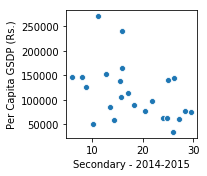

In [0]:
fig=plt.figure(figsize=(8,8))
plt.subplot(331)#scatter plot to show correlation between Secondary drop outs and GSDP
sns.scatterplot(y=df_states_GDP['Per Capita GSDP (Rs.)'],x=df_edu_corr_na['Secondary - 2014-2015'])
plt.show()

In [0]:
corr_values=df_edu_corr.corr()
corr_values.head() # dataframe of correlation coefficients between dropouts and Per capita GDP

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
Primary - 2014-2015,1.000000,0.496418,0.154760,-0.471800
Upper Primary - 2014-2015,0.496418,1.000000,0.603763,-0.531822
Secondary - 2014-2015,0.154760,0.603763,1.000000,-0.432304
Per Capita GSDP (Rs.),-0.471800,-0.531822,-0.432304,1.000000


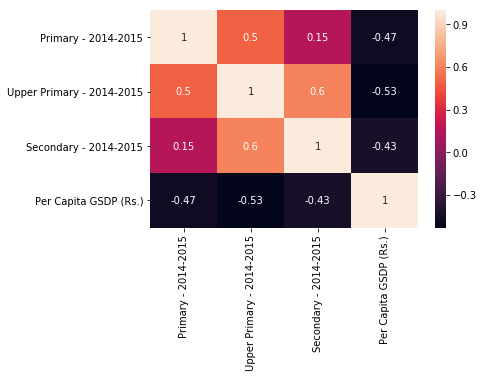

In [0]:
sns.heatmap(corr_values,annot=True)
plt.show() # heat map to plot correlation coefficients

From the analysis done, based on the correlation of education drop-outs and Per-Capita GDP for States following are the key points:<br>
<i><b>Lack of Upper Primary Education and Secondary Education causes more adverse affects on the per Capita GDP of a state in comparision to drop out in Primary Education.Hence Upper Primary Education and Secondary Education are most necessary for good Per Capita GDP rate.</b></i>

 